# Case Study Group 20 

| Name | Matr.number | 
| :-: | :-: |
| Caspar Zindler | 383613 | 
| Charlotte Victoria Lendlein  | 456534 |
| Muzaffer Mert Sen | 415064 |
| Wei-Shan Chang  | 499263 |
| Yahuan Shi | 494877 |

# Table of content
1. [Package imports](#package-import)
2. [Importing the data](#Importing)
    1. [Importing data OEM1_Type11_Type12](#1112)
    2. [Importing data OEM1_Type11_Type12](#2122)
4. [Data preperation](#Dataprep)
    1. [OEM1](#OEM1)
    2. [OEM2](#OEM2)
5. [Creation of the final data set](#Creation)
    1. [Merging OEM1 Type 11](#Merge11)
    2. [Merging OEM1 Type 12](#Merge12)
    3. [Merging OEM1 Type 11 and Type 12](#Merge1112)
    4. [Merging OEM2 Type 21](#Merge21)
    5. [Merging OEM2 Type 22](#Merge22)
    6. [Merging OEM2 Type 21 and Type 22](#Merge2122)
    7. [Merging OEM1 and OEM2](#MergeOEM1OEM2)
6. [Results](#Results)
    1. [Subject of investigation and target audience for visual analysis](#Subject)
    2. [Type of car with premature rust spots](#Rust)
    3. [Production date of vehicles with premature rust spots](#Date)
    4. [Production plant location](#Location)
    5. [Customer car registration location](#Customer)

# Package imports <a name="package-import"></a>

In [5]:
import pandas as pd
from io import StringIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

# Importing the data <a name="Importing"></a>


To import the data needed for the task, the necessary data has to be identified. This firstly requires an understanding of the task. The task is to identify the cars affected by the faulty components as well as the corresponding customers. The company who produced the faulty sheet metals used in the components is the company 217. The faulty sheet metals were produced in the period from Jun1, 2012 to July 31, 2014. The produced body parts, which were installed in the components were installed in the vehicles Type 11, 12, 21 and 22 of the OEM1 and OEM2 car brands.
The next step was to identify which parts were manufactured by the company 217. The first step was to identify the vehicle bodies used for the different cars. These were listed in the “Bestandteile_Fahrzeuge” data. The task specified, that the produced sheet metals were used in the vehicle bodies. Therefore, we can identify the components. The components which resemble the vehicle bodies and the corresponding car types are listed in the table below.


| Car type | Component | 
| :-: | :-: |
| 11 | K4 | 
| 12 | K5 |
| 21 | K6 |
| 22 | K7 |

With these component numbers and the “Bestandteile_Komponente_K” data the different parts used in the components were determined. The parts corresponding to the components are listed in the table below.

| K4 | K5 | K6 | K7 |
| :-: | :-: |:-: | :-: |
| T30 | T30 | T34 | T34 | 
| T31 | T31 | T35 | T35 | 
| T32 | T33 | T36 | T38 | 
|     |     | T37 | T39 | 
|     |     |     | T40 | 

Not all the parts T30 to T40 were produced by company 217. To identify which part wasn’t produced by the company 217 the data frames of the single parts were examined using the numpy function numpy.unique(). By using this function, it was found, that the Parts T36, T38, T39 and T40 wasn’t produced by company 217 and are therefore not relevant for the task. To enhance the performance these data frames weren’t loaded into the program. 

To determine the customers the data “Zulassungen_alle_Fahrzeuge” and “Geodaten_Gemeinden_v1.2_2017-08-22_TrR“ were used. For the identification of the factories of the components the “Tier1_Werke_2017-07-11_v1.2_TrR” data and for the factories of the cars the “OEM_Werke_2017-07-04_TrT” data was used. 
The data about the factories of the single parts wasn’t required for this task, because the goal was to inform the brands and customers. Although this information would be useful for internal investigations of the company 217. 
Finally, the “Fahrzeuge_ OEMX_TypXX” data was used to determine the factories and car IDs of the different car type

.The data comes in two different data types. The first one is a .cvs file. These can be easily imported with the pandas function pandas.read_csv(). Using this function, it's important to specify the correct delimiter. 
The second data type were .txt files. Theescan alson be imported using the pandas.read_csv() function. An important aspect to consider is that the function requires a specific format of the .txt file. The .txt file needs a delimiter between the different values and the rows need to be divided by a line break or a character that denotes a line break, which can be defined by the parameter “lineterminator”

To achieve this format, the data is imported via .read as a string. Then the single values are split by a delimiter into elements. Often the .txt files had no line separator. To detect if a line had ended, the string was checked for "". If this was the case, it meant that two values followed each other with no delimiter and therefore a next line begun. Then the element, which includes the last element of the line and the first element of the next line, was split. Then the two separated elements were appended to their line. The rows are joined to a list and split with a delimiter. The list is then transformed into a data frame via pandas.DataFrame.
 


## Importing data OEM1_Type11_Type12 <a name="1112"></a>


In [9]:
#Importing Einzelteil_T30 
df_Teil30 = pd.read_csv('Data/Einzelteil/Einzelteil_T30.csv',low_memory=False).drop(["Unnamed: 0","ID_T30.x", "Produktionsdatum.x","Herstellernummer.x", "Werksnummer.x", "Fehlerhaft.x", "Fehlerhaft_Datum.x", "Fehlerhaft_Fahrleistung.x", "ID_T30", "Produktionsdatum","Herstellernummer", "Werksnummer", "Fehlerhaft", "Fehlerhaft_Datum", "Fehlerhaft_Fahrleistung","Fehlerhaft.y","Fehlerhaft_Datum.y","Fehlerhaft_Fahrleistung.y"] ,axis="columns"   )

In [10]:
#Reading the .txt file
with open('Data/Einzelteil/Einzelteil_T31.txt', 'r') as file:
    # Importing the data as a string
    T31_inhalt = file.read()
#Seperating through durch \x08, joining by \n, replacing " with '
T31_zeilen = T31_inhalt.split('\x08')
T31_joined = '\n'.join(T31_zeilen)
T31_joined = T31_joined.replace('"', '')

#reading the string into an data frame 
df_T31 = pd.read_csv(StringIO(T31_joined), sep=r'\s+', quotechar='"', engine='python')

In [11]:
#Importing Einzelteil_T32
df_Teil32 = pd.read_csv('Data/Einzelteil/Einzelteil_T32.csv', sep=';',low_memory=False).drop(["Unnamed: 0","ID_T32.x", "Produktionsdatum.x","Herstellernummer.x", "Werksnummer.x", "Fehlerhaft.x", "Fehlerhaft_Datum.x", "Fehlerhaft_Fahrleistung.x","Fehlerhaft.y","Fehlerhaft_Datum.y","Fehlerhaft_Fahrleistung.y"],axis="columns"   )

In [12]:
#importing the Bestanteil_Komponente data
df_K4_Bestandteile_Komponente = pd.read_csv('Data/Komponente/Bestandteile_Komponente_K4.csv', delimiter=';')

#df_K4_Bestandteile_Komponente.head(-1)

In [13]:
#Importing the OEM1_Typ11_Bestandteile data and dropping unnecessary columns
df_OEM1_Typ11_Bestandteile = pd.read_csv('Data/Fahrzeug/Bestandteile_Fahrzeuge_OEM1_Typ11.csv', delimiter=';').drop(["ID_Schaltung","Unnamed: 0","ID_Sitze","ID_Motor"],axis='columns')

#df_OEM1_Typ11_Bestandteile.head(-1)

In [14]:
#Importing the Fahrzeuge_OEM1_Typ11 data and dropping unnecessary columns
df_OEM1_Typ11 = pd.read_csv('Data/Fahrzeug/Fahrzeuge_OEM1_Typ11.csv').drop(['Unnamed: 0','Fehlerhaft','Fehlerhaft_Datum','Fehlerhaft_Fahrleistung'],axis='columns')

#df_OEM1_Typ11.head(-1)

In [15]:
# Load CSV into DataFrame with specified encoding and separator
df_OEM_Werke= pd.read_csv('Data/Geodaten/OEM_Werke_2017-07-04_TrR.csv', sep=';', encoding='ISO-8859-1',low_memory=False)

In [16]:
# Load CSV into DataFrame and drop unnecessary columns
df_KomponenteK4 = pd.read_csv('Data/Komponente/Komponente_K4.csv', sep=';',low_memory=False).drop(["Unnamed: 0", "Fehlerhaft.x", "Fehlerhaft_Datum.x", "Fehlerhaft_Fahrleistung.x","Fehlerhaft.y", "Fehlerhaft_Datum.y", "Fehlerhaft_Fahrleistung.y" ] ,axis="columns"   )

In [17]:
# Load CSV into DataFrame and drop unnecessary columns
df_Teil33 = pd.read_csv('Data/Einzelteil/Einzelteil_T33.csv',low_memory=False).drop(["Unnamed: 0", "Fehlerhaft", "Fehlerhaft_Datum", "Fehlerhaft_Fahrleistung"],axis="columns"  )

In [18]:
# Load CSV into DataFrame
df_K5_Bestandteile_Komponente = pd.read_csv('Data/Komponente/Bestandteile_Komponente_K5.csv', delimiter=';')

In [19]:
# Load CSV into DataFrame and drop unnecessary columns
df_OEM1_Typ12_Bestandteile = pd.read_csv('Data/Fahrzeug/Bestandteile_Fahrzeuge_OEM1_Typ12.csv', delimiter=';').drop(["ID_Schaltung","Unnamed: 0","ID_Sitze","ID_Motor"],axis='columns')

#df_OEM1_Typ12_Bestandteile.head(-1)

In [20]:
# Load CSV into DataFrame and drop unnecessary columns
df_OEM1_Typ12 = pd.read_csv('Data/Fahrzeug/Fahrzeuge_OEM1_Typ12.csv', sep=';',low_memory=False).drop(['Unnamed: 0','Fehlerhaft','Fehlerhaft_Datum','Fehlerhaft_Fahrleistung'],axis='columns')

#df_OEM1_Typ12.head(-1)

In [21]:
# Load CSV into DataFrame and drop unnecessary columns
df_KomponenteK5 = pd.read_csv('Data/Komponente/Komponente_K5.csv', sep=',',low_memory=False).drop(["Unnamed: 0", "Fehlerhaft.x", "Fehlerhaft_Datum.x", "Fehlerhaft_Fahrleistung.x","Fehlerhaft.y", "Fehlerhaft_Datum.y", "Fehlerhaft_Fahrleistung.y" ] ,axis="columns"   )

In [22]:
# Load Tier1 Werke data, rename columns, and clean up
df_Tier1_Werke= pd.read_csv('Data/Geodaten/Tier1_Werke_2017-07-11_v1.2_TrR.csv', sep=';', encoding='ISO-8859-1',low_memory=False)
df_Tier1_Werke.rename(columns={'Werk': 'Werksnummer_Karosserie'}, inplace=True)

## Importing data OEM2_Type21_Type22 <a name="2122"></a>

In [24]:
#Loading the Einzelteil as str
with open('Data/Einzelteil/Einzelteil_T34.txt', 'r') as file:
    data_T34 = file.read()
    
#Splitting the str by the delimiter '| |'
elements_T34 = data_T34.split(' | | ')

#Grouping elements into sets 
lines = []
for i in range(0, len(elements_T34), 9):
    chunk = elements_T34[i:i+9]

#Checking if the last element got 2 ""; If so, splitting the element into 2 and appending the first element 
    if len(chunk) == 9:
        last_element = chunk[-1]
        if '""' in last_element:
            parts = last_element.split('""')
            chunk[-1] = parts[0] + '"'
            chunk.append('"' + parts[1])

#Combining into a single line with '\\'
    lines.append('\\'.join(chunk))

#Processing each line
output_lines = []
t = 0
X1 = 0
for line in lines:
    
#Finding the last element through quotes
    last_quote_index = line.rfind('"')
    second_last_quote_index = line[:last_quote_index].rfind('"')
    
#Separating the last element
    last_element = line[second_last_quote_index:]
    rest_of_line = line[:second_last_quote_index]

#Appending the line excluding the last element for indexing 
    if t==0:
        output_lines.append(rest_of_line)
        X1 = last_element

    if t>=1:
        output_lines.append(X1 + '\\' + rest_of_line )
        X1 = last_element
    t=1

#Defining the column names through the first row
columns_T34 = output_lines[0].split('\\')
columns_T34=['Leer']+columns_T34

#Splitting the remaining rows with '\\' and creating a list
data_list_T34 = [row.split('\\') for row in output_lines[1:]]

#Create the DataFrame via pd.DataFrame and the list and defining the column names
df_T34 = pd.DataFrame(data_list_T34, columns=columns_T34)

In [25]:
#Loading the Einzelteil as str
with open('Data/Einzelteil/Einzelteil_T35.txt', 'r') as file:
    data = file.read()
    
#Splitting the str by the delimiter '\\'
elements = data.split('\\')

#Grouping elements into sets 
lines = []
for i in range(0, len(elements), 15):
    chunk = elements[i:i+15]

#Checking if the last element got 2 ""; If so, splitting the element into 2 and appending the first element 
    if len(chunk) == 15:
        last_element = chunk[-1]
        if '""' in last_element:
            parts = last_element.split('""')
            chunk[-1] = parts[0] + '"'
            chunk.append('"' + parts[1])

#Combining into a single line with '\\'
    lines.append('\\'.join(chunk))

#Processing each line
output_lines = []
t = 0
X1 = 0
for line in lines:
    
#Finding the last element through quotes
    last_quote_index = line.rfind('"')
    second_last_quote_index = line[:last_quote_index].rfind('"')
    
#Separating the last element
    last_element = line[second_last_quote_index:]
    rest_of_line = line[:second_last_quote_index]
    if t==0:
        output_lines.append(rest_of_line)
        X1 = last_element

#Appending the line excluding the last element
    if t>=1:
        output_lines.append(X1 + '\\' + rest_of_line )
        X1 = last_element
    t=1

#Defining the column names through the first row
columns = output_lines[0].split('\\')
    #Deleting last column name
del columns[15]
columns= ["Leer"]+columns

#Splitting the remaining rows with '\\' and creating a list
data_list = [row.split('\\') for row in output_lines[1:]]

#Create the DataFrame via pd.DataFrame and the list and defining the column names
df_T35 = pd.DataFrame(data_list, columns=columns)

In [26]:
#Loading the Einzelteil as str
with open('Data/Einzelteil/Einzelteil_T39.txt', 'r') as file:
    data = file.read()

#Splitting the str by the delimiter '\\'
elements = data.split('\\')

#Grouping elements into sets 
lines = []
for i in range(0, len(elements), 15):
    chunk = elements[i:i+15]

#Checking if the last element got 2 ""; If so, splitting the element into 2 and appending the first element 
    if len(chunk) == 15:
        last_element = chunk[-1]
        if '""' in last_element:
            parts = last_element.split('""')
            chunk[-1] = parts[0] + '"'
            chunk.append('"' + parts[1])

#Combining into a single line with '\\'
    lines.append('\\'.join(chunk))

#Processing each line
output_lines = []
t = 0
X1 = 0
for line in lines:
#Finding the last element through quotes
    last_quote_index = line.rfind('"')
    second_last_quote_index = line[:last_quote_index].rfind('"')
    
#Separating the last element
    last_element = line[second_last_quote_index:]
    rest_of_line = line[:second_last_quote_index]
    if t==0:
        output_lines.append(rest_of_line)
        X1 = last_element

#Appending the line excluding the last element
    if t>=1:
        output_lines.append(X1 + '\\' + rest_of_line )
        X1 = last_element
    t=1

#Defining the column names through the first row
columns = output_lines[0].split('\\')
columns=['Leer']+columns

#Splitting the remaining rows with '\\' and creating a list
data_list = [row.split('\\') for row in output_lines[1:]]

#Create the DataFrame via pd.DataFrame and the list and defining the column names
df_T39 = pd.DataFrame(data_list, columns=columns)

#print(df_T39.head(-1))

In [27]:
    #Loading the Einzelteil as str
#with open('Data/Einzelteil/Einzelteil_T36.txt', 'r') as file:
#    data = file.read()

    #Splitting the str by the delimiter '\\'
#cleaned_string = '\\'.join(data.split())
#elements = cleaned_string.split('\\')

    #Defining the column names through the first row
#columns = elements[:9]
#columns=['Leer']+columns

    #The remaining elements are converted into rows 
#rows = []
#for i in range(9, len(elements), 10):
#    rows.append(elements[i:i+10])

    #Create the DataFrame via pd.DataFrame and the list and defining the column names
#df_Teil36 = pd.DataFrame(rows, columns=columns)

    #Deleting the redundant " & '
#df_Teil36 = df_Teil36.apply(lambda x: x.str.replace('"', '').str.replace("'", ''))
#df_Teil36 = df_Teil36.rename(columns=lambda x: x.replace('"', ''))

    #Printing out the manufacturer
#print(df_Teil36['Herstellernummer'].unique())
print("=> Einzelteil T36 is only produced by company 218 & 219!")

=> Einzelteil T36 is only produced by company 218 & 219!


In [28]:
#df_Teil38 = pd.read_csv('Data/Einzelteil/Einzelteil_T38.csv',low_memory=False)
#einträgeT38_x=df_Teil38['Herstellernummer.x'].unique()
#einträgeT38_y=df_Teil38['Herstellernummer.y'].unique()
#print(einträgeT38_x)
#print(einträgeT38_y)
print('=> Einzelteil T38 is only produced by company 218 and 219!')

=> Einzelteil T38 is only produced by company 218 and 219!


In [29]:
#with open('Data/Einzelteil/Einzelteil_T39.txt', 'r') as file:
#    data = file.read()

#elements = data.split('\\')

#lines = []
#for i in range(0, len(elements), 15):
#    chunk = elements[i:i+15]

#    if len(chunk) == 15:
#        last_element = chunk[-1]
#        if '""' in last_element:
#            parts = last_element.split('""')
#            chunk[-1] = parts[0] + '"'
#            chunk.append('"' + parts[1])

#    lines.append('\\'.join(chunk))

#output_lines = []
#t = 0
#X1 = 0
#for line in lines:
    # Find the last quoted element
#    last_quote_index = line.rfind('"')
#    second_last_quote_index = line[:last_quote_index].rfind('"')
    
    # Separate the last element from the rest of the line
#    last_element = line[second_last_quote_index:]
#    rest_of_line = line[:second_last_quote_index]
#    if t==0:
#        output_lines.append(rest_of_line)
#        X1 = last_element

#    if t>=1:
#        output_lines.append(X1 + '\\' + rest_of_line )
#        X1 = last_element
#    t=1


#columns = output_lines[0].split('\\')
#columns=['Leer']+columns
   
#data_list = [row.split('\\') for row in output_lines[1:]]

#df_T39 = pd.DataFrame(data_list, columns=columns)
#print(df_T39.head(-1))
#print(df_T39['"Herstellernummer.x"'].unique())
#print(df_T39['"Herstellernummer.y"'].unique())
print('=> Einzelteil_T39 is only produced by company 218 & 219!')

=> Einzelteil_T39 is only produced by company 218 & 219!


In [30]:
#df_Teil40 = pd.read_csv('Data/Einzelteil/Einzelteil_T40.csv',sep=';',low_memory=False)
#einträgeT40=df_Teil40['Herstellernummer'].unique()
#print(einträgeT40)
print('=> Einzelteil T40 is only produced by company 219!')

=> Einzelteil T40 is only produced by company 219!


In [31]:
#Importing the data into a data frame and dropping unnecessary columns
df_Teil37 = pd.read_csv('Data/Einzelteil/Einzelteil_T37.csv',low_memory=False).drop(["Unnamed: 0","Fehlerhaft", "Fehlerhaft_Datum", "Fehlerhaft_Fahrleistung"] ,axis="columns")

In [32]:
#Importing the component data
df_K7_Komponente = pd.read_csv('Data/Komponente/Komponente_K7.txt', delimiter='\t')

In [33]:
#Importing component parts data
df_K7_Bestandteile_Komponente = pd.read_csv('Data/Komponente/Bestandteile_Komponente_K7.csv', delimiter=';')

In [34]:
#Importing connection data frames
df_OEM2_Typ22_Bestandteile = pd.read_csv('Data/Fahrzeug/Bestandteile_Fahrzeuge_OEM2_Typ22.csv', delimiter=';').drop(["ID_Schaltung","ID_Sitze","ID_Motor",'X1'],axis='columns')

#df_OEM2_Typ22_Bestandteile.head(-1)

In [35]:
#Importing car data and dropping unnecessary data
df_OEM2_Typ22 = pd.read_csv('Data/Fahrzeug/Fahrzeuge_OEM2_Typ22.csv', sep=';').drop(['Fehlerhaft','Fehlerhaft_Datum','Fehlerhaft_Fahrleistung'],axis='columns')

In [36]:
#Importing the component data
df_K6_Komponente = pd.read_csv('Data/Komponente/Komponente_K6.csv', delimiter=';')

In [37]:
#Importing component parts data
df_K6_Bestandteile_Komponente = pd.read_csv('Data/Komponente/Bestandteile_Komponente_K6.csv', delimiter=';')

#df_K6_Bestandteile_Komponente.head(-1)

In [38]:
#Importing car parts data and dropping unnecessary columns
df_OEM2_Typ21_Bestandteile = pd.read_csv('Data/Fahrzeug/Bestandteile_Fahrzeuge_OEM2_Typ21.csv', delimiter=';').drop(["ID_Schaltung","ID_Sitze","ID_Motor"],axis='columns')

#df_OEM2_Typ21_Bestandteile.head(-1)

In [39]:
#Importing car data and dropping unnecessary columns
df_OEM2_Typ21 = pd.read_csv('Data/Fahrzeug/Fahrzeuge_OEM2_Typ21.csv', sep=',').drop(['Fehlerhaft','Fehlerhaft_Datum','Fehlerhaft_Fahrleistung'],axis='columns')

# Data preperation <a name="Dataprep"></a>

While importing the data via pandas.reac_csv() unnecessary columns were dropped using the pandas.DataFrame.drop() function. The columns were renamed to unify the names between data frames. 
Starting with the single the data frames were filtered by the production date defined in the task. Following up the data frames were filtered by the company 217. In some of the data frames, each company had their own columns. For example has the data “Einzelteil_T30.csv” columns ending with “.x” for the company 216 and columns ending with ".y” for the company 217. To check if these columns only contain value for one company the numpy function numpy.unique() was used. This function finds the unique elements of an array. If for example the columns which ended on “.x” didn’t relate to the company 217, they were dropped.
By doing this only the parts in question remained in the data frames. Based on these parts and their IDs the components which contain these parts were identified. Through these components and their ID the cars in which the components with the faulty parts were installed were identified and isolated. 
This was achieved by merging data frames and defining a filter variable based. This will be discussed in more detail in chapt"Creation of the final data set"r 4.
There could be the case, that one component contains two parts, which were manufactured by company 217 but only one part was manufactured during the given time frame. To identify which of these parts was the faulty one we added a columns name “Problem_TXX”, where “XX” refers to the different part. If for example the column “Problem_T31” got a value of “1”, then the part “T31” installed in this vehicle is faulty. If the column contains the value 0, the part wasn’t manufactured during the given time frame and therefore isn’t faulty. If the column contains no value, the part wasn’t manufactured by the company 27. 


## OEM1 <a name="OEM1"></a>

In [42]:
#dropping unnecessary columns and renaming columns
df_cleaned_Teil30 = df_Teil30.dropna(subset=["Herstellernummer.y"])
df_renamed_Teil30 = df_cleaned_Teil30.rename(columns={'ID_T30.y': 'ID_T30', 'Produktionsdatum.y': 'Produktionsdatum','Herstellernummer.y': 'Herstellernummer','Werksnummer.y': 'Werksnummer'})

#Filtering Einzelteil_T30 by the timeframe in question
df_filtered_Teil30 = df_renamed_Teil30 [(df_renamed_Teil30 ['Produktionsdatum'] >= '2012-06-12') & (df_renamed_Teil30 ['Produktionsdatum'] <= '2014-07-31')]

#df_filtered_Teil30.head(-1)

In [43]:
#cleaning and filtering the dataframe by productiondate and manufacturer
df_T31_cleaned = df_T31.drop(columns=['Fehlerhaft', 'Fehlerhaft_Datum', 'Fehlerhaft_Fahrleistung'])
df_T31_cleaned["Produktionsdatum"]=pd.to_datetime(df_T31_cleaned["Produktionsdatum_Origin_01011970"],unit='D', origin='1970-1-1')
df_T31_cleaned = df_T31_cleaned[(df_T31_cleaned['Produktionsdatum'] >= '2012-06-12') & (df_T31_cleaned['Produktionsdatum'] <= '2014-07-31')]
df_T31_cleaned= df_T31_cleaned[df_T31_cleaned['Herstellernummer'] == 217]
df_T31_cleaned = df_T31_cleaned.drop(columns=['Produktionsdatum_Origin_01011970', 'origin'])

#df_T31_cleaned.head(-1)

In [44]:
#Dropping columns of other manufacturers
df_cleaned_Teil32 = df_Teil32.dropna(subset=["Herstellernummer.y"])

#Renaming columns and filtering columns by the timeframe in question
df_renamed_Teil32 = df_cleaned_Teil32.rename(columns={'ID_T32.y': 'ID_T32', 'Produktionsdatum.y': 'Produktionsdatum','Herstellernummer.y': 'Herstellernummer','Werksnummer.y': 'Werksnummer'})
df_filtered_Teil32 = df_renamed_Teil32 [(df_renamed_Teil32 ['Produktionsdatum'] >= '2012-06-12') & (df_renamed_Teil32 ['Produktionsdatum'] <= '2014-07-31')]

#df_filtered_Teil32.head(-1)

In [45]:
# Rename 'Werk' column to 'Werksnummer'
df_OEM_Werke.rename(columns={'Werk': 'Werksnummer'}, inplace=True)
# Clean 'Werksnummer' by removing 'O' and converting to float
df_OEM_Werke['Werksnummer'] = df_OEM_Werke['Werksnummer'].astype(str).str.replace('O', '').astype("float64")

In [46]:
#merging the Einzelteil data frames by Einzelteil IDs and dropping duplicates
merged_with_Teil30 = df_K4_Bestandteile_Komponente[df_K4_Bestandteile_Komponente['ID_T30'].isin(df_filtered_Teil30['ID_T30'])]
merged_with_Teil31 = df_K4_Bestandteile_Komponente[df_K4_Bestandteile_Komponente['ID_T31'].isin(df_T31_cleaned['ID_T31'])]
merged_with_Teil32 = df_K4_Bestandteile_Komponente[df_K4_Bestandteile_Komponente['ID_T32'].isin(df_filtered_Teil32['ID_T32'])]
df_K4_Bestandteile_Komponente_filtered = pd.concat([merged_with_Teil30, merged_with_Teil31, merged_with_Teil32]).drop_duplicates().reset_index(drop=True)

#df_K4_Bestandteile_Komponente_filtered.head(-1)

In [47]:
# Merge 'ID_Karosserie' columns, then drop original columns
df_KomponenteK4['ID_Karosserie'] = df_KomponenteK4['ID_Karosserie.x'].fillna(df_KomponenteK4['ID_Karosserie.y'])
df_KomponenteK4 = df_KomponenteK4.drop(columns=['ID_Karosserie.x', 'ID_Karosserie.y'])

In [48]:
# Convert 'Produktionsdatum_Origin_01011970' to datetime and create 'Produktionsdatum'
df_Teil33["Produktionsdatum"]=pd.to_datetime(df_Teil33["Produktionsdatum_Origin_01011970"],unit='D', origin='1970-1-1')
# Filter rows by 'Produktionsdatum' within a specific date range
df_Teil33 = df_Teil33 [(df_Teil33 ['Produktionsdatum'] >= '2012-06-12') & (df_Teil33['Produktionsdatum'] <= '2014-07-31')]
# Drop original date columns
df_Teil33=df_Teil33.drop(["Produktionsdatum_Origin_01011970", "origin"],axis="columns" )

#df_Teil33.head(-1)

## OEM2 <a name="OEM1"></a>

In [50]:
#Deleting the redundant " & '
df_T34 = df_T34.apply(lambda x: x.str.replace('"', '').str.replace("'", ''))

#Changing the datatypes of the diffrent columns
df_T34_cleaned=df_T34.astype({'"X1"': int,'"ID_T34"': 'string','"Herstellernummer"':int,'"Werksnummer"':int,'"Produktionsdatum_Origin_01011970"':float,'"origin"':'datetime64[ns]'})

#Dropping the unecessary columns
df_T34_cleaned = df_T34_cleaned.drop(columns=['"Fehlerhaft"', '"Fehlerhaft_Datum"', '"Fehlerhaft_Fahrleistung"',"Leer"])
df_T34_cleaned = df_T34_cleaned.drop(df_T34_cleaned.columns[6],axis=1)

#Calculating the production dates from the origin 
df_T34_cleaned["Produktionsdatum"]=pd.to_datetime(df_T34_cleaned['"Produktionsdatum_Origin_01011970"'],unit='D', origin='1970-1-1')

#Filtering by the manufacturer and the time frame of the production date
df_T34_cleaned = df_T34_cleaned[(df_T34_cleaned['Produktionsdatum'] >= '2012-06-12') & (df_T34_cleaned['Produktionsdatum'] <= '2014-07-31')]
df_T34_cleaned= df_T34_cleaned[df_T34_cleaned['"Herstellernummer"'] == 217]
df_T34_cleaned = df_T34_cleaned.drop(columns=['"Produktionsdatum_Origin_01011970"', '"origin"'])

#Deleting " from column names
df_T34_cleaned = df_T34_cleaned.rename(columns=lambda x: x.replace('"', ''))

#print(df_T34_cleaned.head(-1))
#print(df_T34_cleaned.info())

In [51]:
#Deleting the redundant " & '
df_T35 = df_T35.apply(lambda x: x.str.replace('"', '').str.replace("'", ''))

#Dropping the unecessary columns
df_T35=df_T35.drop(df_T35.columns[[0,6,7,8,9,10,11,12,13,14,15]],axis=1)
df_T35 = df_T35.rename(columns=lambda x: x.replace('"', ''))

#Filtering by the manufacturer and the time frame of the production date
df_T35_cleaned= df_T35[df_T35['Herstellernummer.x'] == '217']
df_T35_cleaned = df_T35_cleaned[(df_T35_cleaned['Produktionsdatum.x'] >= '2012-06-12') & (df_T35_cleaned['Produktionsdatum.x'] <= '2014-07-31')]
                                    

#Changing the datatypes of the diffrent columns
df_T35_cleaned=df_T35_cleaned.astype({'X1': int,'ID_T35.x': 'string','Herstellernummer.x':int,'Werksnummer.x':int, 'Produktionsdatum.x':'datetime64[ns]'})

#print(df_T35_cleaned.head(-1))

In [52]:
#Calculating the production dates from the origin 
df_Teil37["Produktionsdatum"]=pd.to_datetime(df_Teil37["Produktionsdatum_Origin_01011970"],unit='D', origin='1970-1-1')

#Filtering by the manufacturer and the time frame of the production date
df_filtered_Teil37 = df_Teil37 [(df_Teil37 ['Produktionsdatum'] >= '2012-06-12') & (df_Teil37 ['Produktionsdatum'] <= '2014-07-31')]
df_filtered_Teil37 =df_filtered_Teil37.drop(['origin','Produktionsdatum_Origin_01011970'], axis='columns')
df_T37_cleaned=df_filtered_Teil37[df_filtered_Teil37['Herstellernummer']==217]

#df_T37_cleaned.info()

In [53]:
#Calculating the production dates from the origin
df_K7_Komponente['Produktionsdatum_Karosserie']=pd.to_datetime(df_K7_Komponente['Produktionsdatum_Origin_01011970'],unit='D', origin='1970-1-1')

#Renaming columns and dropping unnecessary columns
df_K7_Komponente['Herstellernummer_Karosserie'] = df_K7_Komponente['Herstellernummer']
df_K7_Komponente['Werksnummer_Karosserie'] = df_K7_Komponente['Werksnummer']
df_K7_Komponente=df_K7_Komponente.drop(['X1','Werksnummer','Herstellernummer','Fehlerhaft','Fehlerhaft_Datum','Fehlerhaft_Fahrleistung','Produktionsdatum_Origin_01011970','origin'],axis='columns')

In [54]:
#Calculating the production dates from the origin
df_OEM2_Typ22["Produktionsdatum"]=pd.to_datetime(df_OEM2_Typ22['Produktionsdatum_Origin_01011970'],unit='D', origin='1970-1-1')
df_OEM2_Typ22 = df_OEM2_Typ22.drop(columns=['Produktionsdatum_Origin_01011970', 'origin'])

#df_OEM2_Typ22.head(-1)

In [55]:
#Calculating the production dates from the origin
df_K6_Komponente['Produktionsdatum_Karosserie']=pd.to_datetime(df_K6_Komponente['Produktionsdatum_Origin_01011970'],unit='D', origin='1970-1-1')

#Renaming columns
df_K6_Komponente['Herstellernummer_Karosserie'] = df_K6_Komponente['Herstellernummer']
df_K6_Komponente['Werksnummer_Karosserie'] = df_K6_Komponente['Werksnummer']

#Dropping unnecessary columns
df_K6_Komponente=df_K6_Komponente.drop(['X1','Werksnummer','Herstellernummer','Fehlerhaft','Fehlerhaft_Datum','Fehlerhaft_Fahrleistung','Produktionsdatum_Origin_01011970','origin'],axis='columns')

#df_K6_Komponente.head(-1)

In [56]:
#Calculating the production dates from the origin
df_OEM2_Typ21["Produktionsdatum"]=pd.to_datetime(df_OEM2_Typ21['Produktionsdatum_Origin_01011970'],unit='D', origin='1970-1-1')
df_OEM2_Typ21 = df_OEM2_Typ21.drop(columns=['Produktionsdatum_Origin_01011970', 'origin'])

#df_OEM2_Typ22.head(-1)

# Creation of the final data set <a name="Creation"></a>

As previously mentioned, the approach was to gather the necessary data for each Type and then combine all of this information to create a large DataFrame.

First, the body parts associated with each Type were identified, and it was determined which of these were produced by the "217" company within the given date range. This was done by filtering the data based on conditions such as production dates and manufacturer identifiers.
Next, vehicles associated with these body parts were found by performing merging operations using the pd.merge() function. This function was used to combine different datasets based on shared identifiers, such as vehicle IDs and body IDs, ensuring that all relevant information was brought together into a single DataFram

As an example, the pd.merge() function used in the final DataFrame created for OEM1_TYP11 can be provided.
This combines two tables to create a more enriched dataset. The first table, df_filtered_OEM1_Typ11, contains data related to OEM1_TYP11, while the second table, df_filtered_OEM1_Typ11_Bestandteile, holds additional information about specific components. These two tables are merged based on a common column called ID_Fahrzeug. The merge is done using the pd.merge() function as mentioned above, using a left join. This type of join ensures that all rows from the first table are included in the new table, along with matching ID_Karosserie information from the second table. As a result, the new table OEM1_Typ11_Zusammenfassung contains all the data from the first table, along with the additional ID_Karosserie information from the second table


e.
Once the datasets were merged, unnecessary columns were removed using the drop() function to clean up the DataFrame.
Specific operations were then applied to identify problematic components. The apply() function was used to check if certain component IDs belonged to known problematic sets, and new columns were created to flag these iss
ues.
Finally, the columns were renamed using the rename() function to ensure consistency and clarity in the final DataFrame, where each Brand’s Type was represented with detailed information, including vehicle and body identifiers, production dates, manufacturer numbers, and flags for potential problems with specific components.


## Merging OEM Type 11 <a name="Merge11"></a>

In [59]:
#Definig a filter variable with the uniques Component IDs
id_karosserie_filter = df_K4_Bestandteile_Komponente_filtered['ID_K4'].unique()

# Filtering with the defined filter variable 
df_filtered_OEM1_Typ11_Bestandteile = df_OEM1_Typ11_Bestandteile[df_OEM1_Typ11_Bestandteile['ID_Karosserie'].isin(id_karosserie_filter)]

#df_filtered_OEM1_Typ11_Bestandteile.head(-1)

In [60]:
#Defining a filter variable based on car IDs
id_fahrzeug_filter = df_filtered_OEM1_Typ11_Bestandteile['ID_Fahrzeug'].unique()

#Filtering based on filter variable
df_filtered_OEM1_Typ11  = df_OEM1_Typ11[df_OEM1_Typ11 ['ID_Fahrzeug'].isin(id_fahrzeug_filter)]

#df_filtered_OEM1_Typ11.head(-1)

In [61]:
# Merge filtered DataFrame with 'df_OEM_Werke' on 'Werksnummer'
df_merged_Werk_ORT = pd.merge(df_filtered_OEM1_Typ11, df_OEM_Werke, on='Werksnummer', how='left')
# Strip leading/trailing spaces from column names and replace incorrect 'Lngengrad' with 'Längengrad'
df_merged_Werk_ORT.columns = df_merged_Werk_ORT.columns.str.strip() 
df_merged_Werk_ORT.columns = df_merged_Werk_ORT.columns.str.replace('Lngengrad', 'Längengrad', regex=False) 
# Drop unnecessary columns from the merged DataFrame
df_filtered_OEM1_Typ11 = df_merged_Werk_ORT.drop(columns=[ 'PLZ', 'Breitengrad', 'Längengrad'])

#df_filtered_OEM1_Typ11.head()

In [62]:
# Merge 'Produktionsdatum' columns, then drop original columns
df_KomponenteK4['Produktionsdatum_Karosserie'] = df_KomponenteK4['Produktionsdatum.x'].fillna(df_KomponenteK4['Produktionsdatum.y'])
df_KomponenteK4 = df_KomponenteK4.drop(columns=['Produktionsdatum.x', 'Produktionsdatum.y'])
# Merge 'Herstellernummer' columns, then drop original columns
df_KomponenteK4['Herstellernummer_Karosserie'] = df_KomponenteK4['Herstellernummer.x'].fillna(df_KomponenteK4['Herstellernummer.y'])
df_KomponenteK4 = df_KomponenteK4.drop(columns=['Herstellernummer.x', 'Herstellernummer.y'])
# Merge 'Werksnummer' columns, then drop original columns
df_KomponenteK4['Werksnummer_Karosserie'] = df_KomponenteK4['Werksnummer.x'].fillna(df_KomponenteK4['Werksnummer.y'])
df_KomponenteK4 = df_KomponenteK4.drop(columns=['Werksnummer.x', 'Werksnummer.y'])
# Load and process Tier1 Werke data
df_Tier1_Werke= pd.read_csv('Data/Geodaten/Tier1_Werke_2017-07-11_v1.2_TrR.csv', sep=';', encoding='ISO-8859-1',low_memory=False)
df_Tier1_Werke.rename(columns={'Werk': 'Werksnummer_Karosserie'}, inplace=True)
# Merge with 'df_Tier1_Werke' on 'Werksnummer_Karosserie'
df_merged_Werk = pd.merge(df_KomponenteK4, df_Tier1_Werke, on='Werksnummer_Karosserie', how='left')
# Clean column names and remove unnecessary columns
df_merged_Werk.columns = df_merged_Werk.columns.str.strip() 
df_merged_Werk.columns = df_merged_Werk.columns.str.replace('Lngengrad', 'Längengrad', regex=False) 
df_merged_Werk = df_merged_Werk.drop(columns=['X1', 'PLZ', 'Breitengrad', 'Längengrad'])
# Rename 'ORT' column
df_merged_Werk.rename(columns={'ORT': 'ORT_Karosserie'}, inplace=True)

#df_merged_Werk.head(-1)

In [63]:
# Merge filtered OEM1 Typ11 with its components
OEM1_Typ11_Zusammenfassung = pd.merge(df_filtered_OEM1_Typ11, df_filtered_OEM1_Typ11_Bestandteile[['ID_Fahrzeug', 'ID_Karosserie']], on='ID_Fahrzeug', how='left')
# Merge with K4 components
OEM1_Typ11_Zusammenfassung2 = pd.merge(OEM1_Typ11_Zusammenfassung, df_K4_Bestandteile_Komponente_filtered[['ID_K4', 'ID_T30', 'ID_T31', 'ID_T32']], left_on='ID_Karosserie', right_on='ID_K4', how='left')
# Drop 'ID_K4' column
OEM1_Typ11_Zusammenfassung2= OEM1_Typ11_Zusammenfassung2.drop(["ID_K4"], axis= "columns")
# Merge with Werk data
OEM1_Typ11_Zusammenfassung2 = pd.merge(OEM1_Typ11_Zusammenfassung2, df_merged_Werk, on='ID_Karosserie', how='left')
# Create sets for checking problem IDs
id_t30_set = set(df_filtered_Teil30['ID_T30'])
id_t31_set = set(df_T31_cleaned['ID_T31'])
id_t32_set = set(df_filtered_Teil32['ID_T32'])
# Add problem flags based on presence in ID sets
OEM1_Typ11_Zusammenfassung2['ProblemT30'] = OEM1_Typ11_Zusammenfassung2['ID_T30'].apply(lambda x: '1' if x in id_t30_set else '0')
OEM1_Typ11_Zusammenfassung2['ProblemT31'] = OEM1_Typ11_Zusammenfassung2['ID_T31'].apply(lambda x: '1' if x in id_t31_set else '0')
OEM1_Typ11_Zusammenfassung2['ProblemT32'] = OEM1_Typ11_Zusammenfassung2['ID_T32'].apply(lambda x: '1' if x in id_t32_set else '0')
# Rename columns for clarity
OEM1_Typ11_Zusammenfassung2.rename(columns={'Produktionsdatum': 'Produktionsdatum_Fahrzeug', 'Herstellernummer': 'Herstellernummer_Fahrzeug', 'Werksnummer': 'Werksnummer_Fahrzeug', 'Ort': 'ORT_Fahrzeug' }, inplace=True)

#OEM1_Typ11_Zusammenfassung2.info()

## Merging OEM Type 12 <a name="Merge12"></a>

In [65]:
# Filter rows based on 'ID_T30' from 'df_filtered_Teil30'
merged_with_Teil30 = df_K5_Bestandteile_Komponente[df_K5_Bestandteile_Komponente['ID_T30'].isin(df_filtered_Teil30['ID_T30'])]

# Filter rows based on 'ID_T31' from 'df_T31_cleaned'
merged_with_Teil31 = df_K5_Bestandteile_Komponente[df_K5_Bestandteile_Komponente['ID_T31'].isin(df_T31_cleaned['ID_T31'])]

# Filter rows based on 'ID_T33' from 'df_Teil33'
merged_with_Teil33 = df_K5_Bestandteile_Komponente[df_K5_Bestandteile_Komponente['ID_T33'].isin(df_Teil33['ID_T33'])]

# Concatenate filtered DataFrames, remove duplicates, and reset index
df_K5_Bestandteile_Komponente_filtered = pd.concat([merged_with_Teil30, merged_with_Teil31, merged_with_Teil33]).drop_duplicates().reset_index(drop=True)

#df_K5_Bestandteile_Komponente_filtered.head(-1)

In [66]:
# Extract unique 'ID_K5' values from filtered K5 components
id_karosserie_filter = df_K5_Bestandteile_Komponente_filtered['ID_K5'].unique()

# Filter OEM1 Typ12 components based on 'ID_Karosserie' present in 'id_karosserie_filter'
df_filtered_OEM1_Typ12_Bestandteile = df_OEM1_Typ12_Bestandteile[df_OEM1_Typ12_Bestandteile['ID_Karosserie'].isin(id_karosserie_filter)]

#df_filtered_OEM1_Typ12_Bestandteile.head(-1)

In [67]:
# Extract unique 'ID_Fahrzeug' values from filtered OEM1 Typ12 components
id_fahrzeug_filter2 = df_filtered_OEM1_Typ12_Bestandteile['ID_Fahrzeug'].unique()

# Filter OEM1 Typ12 vehicles based on 'ID_Fahrzeug' present in 'id_fahrzeug_filter2'
df_filtered_OEM1_Typ12  = df_OEM1_Typ12[df_OEM1_Typ12 ['ID_Fahrzeug'].isin(id_fahrzeug_filter2)]

#df_filtered_OEM1_Typ12.head(-1)

In [68]:
# Merge filtered OEM1 Typ12 vehicles with Werk data on 'Werksnummer'
df_merged_Werk_ORT_Type12 = pd.merge(df_filtered_OEM1_Typ12, df_OEM_Werke, on='Werksnummer', how='left')

# Clean column names: remove leading/trailing spaces and fix special characters
df_merged_Werk_ORT_Type12.columns = df_merged_Werk_ORT_Type12.columns.str.strip() 
df_merged_Werk_ORT_Type12.columns = df_merged_Werk_ORT_Type12.columns.str.replace('Lngengrad', 'Längengrad', regex=False)  

# Drop unnecessary columns
df_filtered_OEM1_Typ12 = df_merged_Werk_ORT_Type12.drop(columns=[ 'PLZ', 'Breitengrad', 'Längengrad'])

#df_filtered_OEM1_Typ12.head()

In [69]:
# Merge columns with 'fillna' and drop the original columns
df_KomponenteK5['ID_Karosserie'] = df_KomponenteK5['ID_Karosserie.x'].fillna(df_KomponenteK5['ID_Karosserie.y'])
df_KomponenteK5 = df_KomponenteK5.drop(columns=['ID_Karosserie.x', 'ID_Karosserie.y'])
df_KomponenteK5['Produktionsdatum_Karosserie'] = df_KomponenteK5['Produktionsdatum.x'].fillna(df_KomponenteK5['Produktionsdatum.y'])
df_KomponenteK5 = df_KomponenteK5.drop(columns=['Produktionsdatum.x', 'Produktionsdatum.y'])
df_KomponenteK5['Herstellernummer_Karosserie'] = df_KomponenteK5['Herstellernummer.x'].fillna(df_KomponenteK5['Herstellernummer.y'])
df_KomponenteK5 = df_KomponenteK5.drop(columns=['Herstellernummer.x', 'Herstellernummer.y'])
df_KomponenteK5['Werksnummer_Karosserie'] = df_KomponenteK5['Werksnummer.x'].fillna(df_KomponenteK5['Werksnummer.y'])
df_KomponenteK5 = df_KomponenteK5.drop(columns=['Werksnummer.x', 'Werksnummer.y'])

#Merge component data with factory data komponent factory
df_merged_Werk = pd.merge(df_KomponenteK5, df_Tier1_Werke, on='Werksnummer_Karosserie', how='left')

#Delete redundant spaces
df_merged_Werk.columns = df_merged_Werk.columns.str.strip() 

#Correcting column name
df_merged_Werk.columns = df_merged_Werk.columns.str.replace('Lngengrad', 'Längengrad', regex=False) 

# Drop unnecessary columns and rename 'ORT' column
df_merged_Werk_Type12 = df_merged_Werk.drop(columns=['X1', 'PLZ', 'Breitengrad', 'Längengrad'])
df_merged_Werk_Type12.rename(columns={'ORT': 'ORT_Karosserie'}, inplace=True)

#df_merged_Werk_Type12.head(-1)

In [70]:
# Merge filtered OEM1 Typ12 vehicles with vehicle parts data on 'ID_Fahrzeug'
OEM1_Typ12_Zusammenfassung = pd.merge(df_filtered_OEM1_Typ12, df_filtered_OEM1_Typ12_Bestandteile[['ID_Fahrzeug', 'ID_Karosserie']], on='ID_Fahrzeug', how='left')

# Merge with K5 components data on 'ID_Karosserie' and 'ID_K5', drop 'X1' and 'ID_K5' columns
OEM1_Typ12_Zusammenfassung2 = pd.merge(OEM1_Typ12_Zusammenfassung, df_K5_Bestandteile_Komponente_filtered[['ID_K5', 'ID_T30', 'ID_T31', 'ID_T33']], left_on='ID_Karosserie', right_on='ID_K5', how='left')
OEM1_Typ12_Zusammenfassung2= OEM1_Typ12_Zusammenfassung2.drop(["X1", "ID_K5"], axis= "columns")

# Merge with Werk data on 'ID_Karosserie'
OEM1_Typ12_Zusammenfassung2 = pd.merge(OEM1_Typ12_Zusammenfassung2, df_merged_Werk_Type12, on='ID_Karosserie', how='left')
id_t30_set = set(df_filtered_Teil30['ID_T30'])
id_t31_set = set(df_T31_cleaned['ID_T31'])
id_t33_set = set(df_Teil33['ID_T33'])

# Create columns indicating if there are issues with components
OEM1_Typ12_Zusammenfassung2['ProblemT30'] = OEM1_Typ12_Zusammenfassung2['ID_T30'].apply(lambda x: '1' if x in id_t30_set else '0')
OEM1_Typ12_Zusammenfassung2['ProblemT31'] = OEM1_Typ12_Zusammenfassung2['ID_T31'].apply(lambda x: '1' if x in id_t31_set else '0')
OEM1_Typ12_Zusammenfassung2['ProblemT33'] = OEM1_Typ12_Zusammenfassung2['ID_T33'].apply(lambda x: '1' if x in id_t33_set else '0')

# Rename columns for clarity
OEM1_Typ12_Zusammenfassung2.rename(columns={'Produktionsdatum': 'Produktionsdatum_Fahrzeug', 'Herstellernummer': 'Herstellernummer_Fahrzeug', 'Werksnummer': 'Werksnummer_Fahrzeug', 'Ort': 'ORT_Fahrzeug' }, inplace=True)

#OEM1_Typ12_Zusammenfassung2.head(-1)

## Merging OEM1 Type11 and Type12 <a name="Merge1112"></a>

In [72]:
# Concatenate Type11 and Type12 data into a single DataFrame
df_Type11_Type12 = pd.concat([OEM1_Typ11_Zusammenfassung2, OEM1_Typ12_Zusammenfassung2], ignore_index=True)

# Rename 'ORT' column to 'ORT_Fahrzeug'
df_Type11_Type12.rename(columns={'ORT': 'ORT_Fahrzeug' }, inplace=True)

# Extract vehicle type from 'ID_Fahrzeug' and add it as a new column
df_Type11_Type12['Type_Fahrzeug'] = df_Type11_Type12['ID_Fahrzeug'].str.split('-').str[0]
df_Type11_Type12.insert(2, 'Type_Fahrzeug', df_Type11_Type12.pop('Type_Fahrzeug'))

# Reorder columns: move 'ID_T33' to column 11
df_Type11_Type12.insert(11, 'ID_T33', df_Type11_Type12.pop('ID_T33'))

# Drop 'X1' column
df_Type11_Type12 = df_Type11_Type12.drop(columns=['X1'], axis= "columns")

#df_Type11_Type12.head(-1)

## Merging OEM2 Type 22 <a name="Merge22"></a>

In [74]:
#Merging comopnent and factory data on Werksnummer_Karosserie
df_merged_Werk_Typ22= pd.merge(df_K7_Komponente, df_Tier1_Werke, on='Werksnummer_Karosserie', how='left')

#Renaming column, replacing 'Lngengrad' with 'Längengrad'
df_merged_Werk_Typ22.columns = df_merged_Werk_Typ22.columns.str.replace('Lngengrad', 'Längengrad', regex=False) 

#Dropping unnecessary columns
df_merged_Werk_Typ22 = df_merged_Werk_Typ22.drop(['Breitengrad', 'Längengrad','PLZ '],axis=1)

#print(df_merged_Werk_Typ22.head(5))

In [75]:
#Merging with parts data on part IDs
merged_with_Teil34 = df_K7_Bestandteile_Komponente[df_K7_Bestandteile_Komponente['ID_T34'].isin(df_T34_cleaned['ID_T34'])]
merged_with_Teil35 = df_K7_Bestandteile_Komponente[df_K7_Bestandteile_Komponente['ID_T35'].isin(df_T35_cleaned['ID_T35.x'])]

#Joining data frames
df_K7_Bestandteile_Komponente_filtered = pd.concat([merged_with_Teil34, merged_with_Teil35]).drop_duplicates().reset_index(drop=True)

#df_K7_Bestandteile_Komponente_filtered.head(-1)

In [76]:
#Defining filter variable
id_karosserie_filter = df_K7_Bestandteile_Komponente_filtered['ID_K7'].unique()

#Filtering based on the filter variable
df_filtered_OEM2_Typ22_Bestandteile = df_OEM2_Typ22_Bestandteile[df_OEM2_Typ22_Bestandteile['ID_Karosserie'].isin(id_karosserie_filter)]

#df_filtered_OEM2_Typ22_Bestandteile.head(-1)

In [77]:
#Defining filter variable
id_fahrzeug_filter = df_filtered_OEM2_Typ22_Bestandteile['ID_Fahrzeug'].unique()

#Filtering based on the filter variable (car IDs)
df_filtered_OEM2_Typ22  = df_OEM2_Typ22[df_OEM2_Typ22 ['ID_Fahrzeug'].isin(id_fahrzeug_filter)]

#df_filtered_OEM2_Typ22.head(-1)

In [78]:
#Assigning values to places
wert_zu_ort = {
    11: 'NUERNBERG',
    12: 'BONN',
    13: 'BIELEFELD',
    21: 'GOETTINGEN',
    22: 'REGENSBURG'
}

#Creating a new column with the places regarding the factory number
df_filtered_OEM2_Typ22.loc[:, 'Ort'] = df_filtered_OEM2_Typ22['Werksnummer'].map(wert_zu_ort)

#df_filtered_OEM2_Typ22.head(-1)

In [79]:
#Merging the cars and the cars components dataframe on cars IDs
OEM2_Typ22_Zusammenfassung = pd.merge(df_filtered_OEM2_Typ22, df_filtered_OEM2_Typ22_Bestandteile[['ID_Fahrzeug', 'ID_Karosserie']], on='ID_Fahrzeug', how='left')

#Merging with the component parts on component IDs
OEM2_Typ22_Zusammenfassung2 = pd.merge(OEM2_Typ22_Zusammenfassung, df_K7_Bestandteile_Komponente_filtered[['ID_K7', 'ID_T34', 'ID_T35','ID_T38','ID_T39','ID_T40']], left_on='ID_Karosserie', right_on='ID_K7', how='left')

#Dropping unnecessary columns
OEM2_Typ22_Zusammenfassung2= OEM2_Typ22_Zusammenfassung2.drop(["X1", "ID_K7"], axis= "columns")

#Defining columns from T34,T35 cleaned as variables
id_t34_set = set(df_T34_cleaned['ID_T34'])
id_t35_set = set(df_T35_cleaned['ID_T35.x'])

#Dropping unnecessary columns
OEM2_Typ22_Zusammenfassung2=OEM2_Typ22_Zusammenfassung2.drop(OEM2_Typ22_Zusammenfassung2.columns[0],axis=1)

#Creating columns that indicate if the part was faulty (yes) or not faulty (no)
OEM2_Typ22_Zusammenfassung2['ProblemT34'] = OEM2_Typ22_Zusammenfassung2['ID_T34'].apply(lambda x: 'yes' if x in id_t34_set else 'no')
OEM2_Typ22_Zusammenfassung2['ProblemT35'] = OEM2_Typ22_Zusammenfassung2['ID_T35'].apply(lambda x: 'yes' if x in id_t35_set else 'no')

#Merging with component factory data on component IDs
OEM2_Typ22_Zusammenfassung2 = pd.merge(OEM2_Typ22_Zusammenfassung2, df_merged_Werk_Typ22, on='ID_Karosserie', how='left')

#Creating new column that indicates the car type 
OEM2_Typ22_Zusammenfassung2['Type_Fahrzeug']=22

#OEM2_Typ22_Zusammenfassung2.head(-1)

## Merging OEM Type 21 <a name="Merge21"></a>

In [81]:
#Merging component data with component factory data an factory number
df_merged_Werk_Typ21= pd.merge(df_K6_Komponente, df_Tier1_Werke, on='Werksnummer_Karosserie', how='left')

#Correcting column name
df_merged_Werk_Typ21.columns = df_merged_Werk_Typ21.columns.str.replace('Lngengrad', 'Längengrad', regex=False) 

#Dropping unnecessary columns
df_merged_Werk_Typ21 = df_merged_Werk_Typ21.drop(['Breitengrad', 'Längengrad','PLZ '],axis=1)

#print(df_merged_Werk_Typ21.head(5))

In [82]:
#Merging component parts data with the different parts data
merged_with_Teil34 = df_K6_Bestandteile_Komponente[df_K6_Bestandteile_Komponente['ID_T34'].isin(df_T34_cleaned['ID_T34'])]
merged_with_Teil35 = df_K6_Bestandteile_Komponente[df_K6_Bestandteile_Komponente['ID_T35'].isin(df_T35_cleaned['ID_T35.x'])]
merged_with_Teil37 = df_K6_Bestandteile_Komponente[df_K6_Bestandteile_Komponente['ID_T37'].isin(df_T37_cleaned['ID_T37'])]

#Joining data frames
df_K6_Bestandteile_Komponente_filtered = pd.concat([merged_with_Teil34, merged_with_Teil35,merged_with_Teil37]).drop_duplicates().reset_index(drop=True)

#df_K6_Bestandteile_Komponente_filtered.head(-1)

In [83]:
#Defining filter cariable based in components IDs
id_karosserie_filter_K6 = df_K6_Bestandteile_Komponente_filtered['ID_K6'].unique()

#Filtering the data frame based on component IDs 
df_filtered_OEM2_Typ21_Bestandteile = df_OEM2_Typ21_Bestandteile[df_OEM2_Typ21_Bestandteile['ID_Karosserie'].isin(id_karosserie_filter_K6)]

#df_filtered_OEM2_Typ21_Bestandteile.head(-1)

In [84]:
#Defining a filter variable based on cars ID
id_fahrzeug_filter_Typ21 = df_filtered_OEM2_Typ21_Bestandteile['ID_Fahrzeug'].unique()

#Filtering the data frame with the filter variable
df_filtered_OEM2_Typ21 = df_OEM2_Typ21[df_OEM2_Typ21 ['ID_Fahrzeug'].isin(id_fahrzeug_filter_Typ21)]

#df_filtered_OEM2_Typ21.head(-1)

In [85]:
#Creating a new column with the places regarding the factory number
df_filtered_OEM2_Typ21.loc[:, 'Ort'] = df_filtered_OEM2_Typ21['Werksnummer'].map(wert_zu_ort)

#df_filtered_OEM2_Typ21.head(-1)

In [86]:
#Merging the cars and the components on cars IDs
OEM2_Typ21_Zusammenfassung = pd.merge(df_filtered_OEM2_Typ21, df_filtered_OEM2_Typ21_Bestandteile[['ID_Fahrzeug', 'ID_Karosserie']], on='ID_Fahrzeug', how='left')

#Merging with the component parts on component IDs
OEM2_Typ21_Zusammenfassung2 = pd.merge(OEM2_Typ21_Zusammenfassung, df_K6_Bestandteile_Komponente_filtered[['ID_K6', 'ID_T34', 'ID_T35','ID_T36','ID_T37']], left_on='ID_Karosserie', right_on='ID_K6', how='left')

#Dropping unnecessary columns
OEM2_Typ21_Zusammenfassung2= OEM2_Typ21_Zusammenfassung2.drop(["X1", "ID_K6"], axis= "columns")

#Defining columns from T34, T35, T37 cleaned as variables
id_t34_set = set(df_T34_cleaned['ID_T34'])
id_t35_set = set(df_T35_cleaned['ID_T35.x'])
id_t37_set = set(df_T37_cleaned['ID_T37'])

#Dropping unnecessary columns
OEM2_Typ21_Zusammenfassung2=OEM2_Typ21_Zusammenfassung2.drop(OEM2_Typ21_Zusammenfassung2.columns[0],axis=1)

#Creating columns that indicate if the part was faulty (yes) or not faulty (no)
OEM2_Typ21_Zusammenfassung2['ProblemT34'] = OEM2_Typ21_Zusammenfassung2['ID_T34'].apply(lambda x: 'yes' if x in id_t34_set else 'no')
OEM2_Typ21_Zusammenfassung2['ProblemT35'] = OEM2_Typ21_Zusammenfassung2['ID_T35'].apply(lambda x: 'yes' if x in id_t35_set else 'no')
OEM2_Typ21_Zusammenfassung2['ProblemT37'] = OEM2_Typ21_Zusammenfassung2['ID_T37'].apply(lambda x: 'yes' if x in id_t37_set else 'no')

#Merging with component facroty data on component IDs
OEM2_Typ21_Zusammenfassung2 = pd.merge(OEM2_Typ21_Zusammenfassung2, df_merged_Werk_Typ21, on='ID_Karosserie', how='left')

#Creating a new column that indicates the car type
OEM2_Typ21_Zusammenfassung2['Type_Fahrzeug']=21

#OEM2_Typ21_Zusammenfassung2.head(-1)

## Merging OEM2 Type 21 and Type 22 <a name="Merge2122"></a>

In [88]:
#Joining date frames
df_Type21_Type22 = pd.concat([OEM2_Typ21_Zusammenfassung2, OEM2_Typ22_Zusammenfassung2], ignore_index=True)

In [89]:
#Dropping unnecessary columns
df_Type21_Type22=df_Type21_Type22.drop(['Unnamed: 0'],axis='columns')

#df_Type21_Type22.info()

In [90]:
#Rearranging and renaming columns 
df_Type21_Type22.insert(1, 'Type_Fahrzeug', df_Type21_Type22.pop('Type_Fahrzeug'))
df_Type21_Type22.insert(2, 'Produktionsdatum_Fahrzeug', df_Type21_Type22.pop('Produktionsdatum'))
df_Type21_Type22.rename(columns={'Ort': 'ORT_Fahrzeug','Herstellernummer':'Herstellernummer_Fahrzeug','Werksnummer':'Werksnummer_Fahrzeug'}, inplace=True)
df_Type21_Type22.insert(10,'ID_T38', df_Type21_Type22.pop('ID_T38'))
df_Type21_Type22.insert(11, 'ID_T39', df_Type21_Type22.pop('ID_T39'))
df_Type21_Type22.insert(12, 'ID_T40', df_Type21_Type22.pop('ID_T40'))
df_Type21_Type22.insert(20, 'ProblemT34', df_Type21_Type22.pop('ProblemT34'))
df_Type21_Type22.insert(20, 'ProblemT35', df_Type21_Type22.pop('ProblemT35'))
df_Type21_Type22.insert(20, 'ProblemT37', df_Type21_Type22.pop('ProblemT37'))

## Merging OEM1 and OEM2 <a name="MergeOEM1OEM2"></a>

In [92]:
#Joining OEM1 and OEM2 data frames
df_gesamt = pd.concat([df_Type21_Type22, df_Type11_Type12], ignore_index=True)

#df_gesamt.head(-1)

In [93]:
# filter and sort Zulassungen data frame
customer = pd.read_csv('Data/Zulassungen/Zulassungen_alle_Fahrzeuge.csv', 
                        delimiter=';', 
                        quotechar='"', 
                        usecols=["IDNummer", "Gemeinden", "Zulassung"],on_bad_lines='skip')
# convert 'Zulassung'-column in Datetime-Format
customer['Zulassung'] = pd.to_datetime(customer['Zulassung'])

# filter data for'Zulassung' later than or equal to 2012
customer_filtered = customer[customer['Zulassung'] >= '2012-01-01']

# merge tables customer_filtered and df_gesamt with column 'Fahrzeug ID' 
df_gesamt = pd.merge(df_gesamt, 
                         customer_filtered[['IDNummer', 'Gemeinden', 'Zulassung']], 
                         left_on='ID_Fahrzeug', 
                         right_on='IDNummer', 
                         how='left')
#print(df_gesamt.head(-1))

df_gesamt.drop(columns=["IDNummer"],inplace=True)
#print(df_gesamt.head())

#Exporting the final data as a .csv file
#df_gesamt.to_csv("C:/Users/caspa/Nextcloud/IDA_Case_Study/Submission/20_SoSe24_IDA_CaseStudy/final_data_group_20.csv")

In [94]:
#Renaming the dataframes regarding OEM1 and OEM2
OEM1=df_gesamt[df_gesamt['Herstellernummer_Fahrzeug'] == 1]
OEM2=df_gesamt[df_gesamt['Herstellernummer_Fahrzeug'] == 2]

The meaning of the columns of the final data frame is listed in the table below.

| Column| Meaning |
| :-: | :-: |
|ID_Fahrzeug|Car ID number|
|Type_Fahrzeug|Type of the car|
|Produktionsdatum_Fahrzeug|Production date of the car|
|Herstellernummer_Fahrzeug|Manufacturer of the car|
|Werksnummer_Fahrzeug|Factory number of car|
|ORT_Fahrzeug|Production place of the car|
|ID_Karosserie|Component ID number|
|Produktionsdatum_Karosserie|Production date of the component|
|Herstellernummer_Karosserie|Manufacturer of the component|
|Werksnummer_Karosserie|Factory number of the component|
|ORT_Karosserie|Production place of the component|
|ID_TXX|Part ID number (XX refers to part number)|
|ProblemTXX|Indicator if part is faulty|
|ORT|Place of Registration|
|Gemeinden_x|Community of registration|
|Zulassung_x|Registration|
|Gemeinden_y|Community of Registration|
|Zulassung_y|Registration|

# Results <a name="Results"></a>

## Subject of investigation and target audience for visual analysis <a name="Subject"></a>

The final dataset includes all vehicles in which rust spot affected sheet metal from the company 217 was installed. These vehicles are manufactured by companies OEM1 and OEM2 that should now be informed about critical production quantities. Therefore, in the visualization analysis, there are separate data frames for the manufacturers OEM1 and OEM2 which reduces processing times. Additionally, affected customers should be informed. Therefore, the analyzation of the dataset needs to be targeted at the car manufacturing companies and the customers.


For extraction of the relevant factors from the final dataset, a schematic figure below (see fig 1) shows the connections between columns in the final dataset. The sheet metal with rust spots from company 217 is installed in various parts that make up the chassis, which is manufactured into a car by car manufacturers OEM1 and OEM2. The affected customers can be identified via their car’s ID number provided by the car manufacturer. The customers have different car registration locations that can be analyzed visually. For informing the car manufacturers with relevant information, the types of cars manufactured and their production plant and date are analyzed visually. This way, the car manufacturer can improve the testing and control in relevant production plants, so that in the future, premature rust spots can be identified in these locations. 

![Graph of connections from production of the chassis with faulty part caused by company 217 ](Additional_Files/Connection_Graph.png)

This Graph shows the connections from production of the chassis with faulty part caused by company 217 to the vehicle of the part installed in to the customer who buys the car; green: parts highlighted in this color are relevant information for the visual analysis task

## Type of car with premature rust spots <a name="Rust"></a>

In a first step, all cars with premature rust spots that are listed in the data frame “df_gesamt” are categorized according to the type of vehicle. Car manufacturer OEM1 has produced over 400000 cars of the type 11 and over 100000 cars of type 12 that contain parts with rust spots. Car manufacturer OEM2 has produced over 100000 cars of type 21 and over 50000 cars of type 22 with potential rust spots occurring. It can be deduced that car manufacturer OEM1 has a higher total number of customers to inform about this manufacturing error than OEM2. The second type of car of both manufacturers is less likely than their first types of vehicles to be affected by the rust spot issue of company 217. 

In [99]:
# bar plot for the total number of vehicles with premature rust spots for each vehicle type (11, 12, 21, 22)
anzahl_typ=df_gesamt['Type_Fahrzeug'].value_counts()

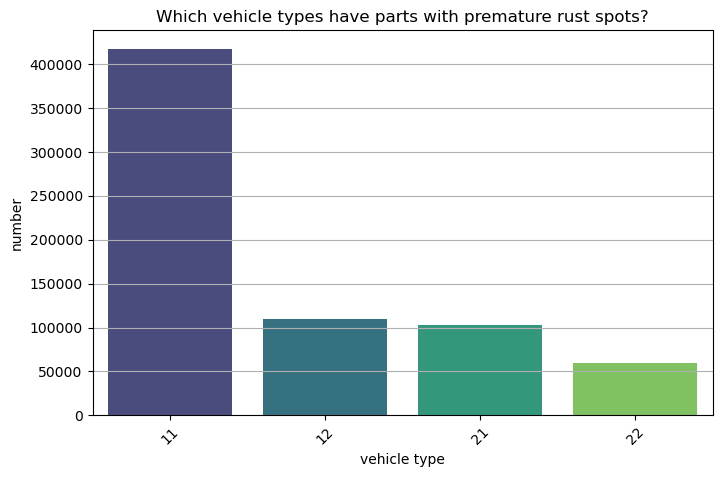

In [100]:
plt.figure(figsize=(8, 5))
sns.barplot(x=anzahl_typ.index, y=anzahl_typ.values, palette='viridis')
plt.xlabel('vehicle type')
plt.ylabel('number')
plt.title('Which vehicle types have parts with premature rust spots?')
plt.xticks(rotation=45)
plt.grid(axis='y')

# display the diagram
plt.show()

## Production date of vehicles with premature rust spots <a name="Date"></a>

For analyzing when the cars with potential rust spots were assembled by the car manufacturers OEM1 and OEM2, the production months and years are displayed in the graphs below for each car manufacturer separately, based on the data frames “OEM1” and “OEM2”, respectively. Each car manufacturer gets their own graph for this analysis, so that they can identify the critical production months and years of their own company and improve control management during the identified critical production times in the future. It can be seen that the production month of July and August are critical in both companies. During these months, a larger number of cars with critical components are produced with a peak occurring in July with a total amount of over 60000 cars with premature rust spots produced by OEM1 and a peak in faulty cars, namely over 17500, produced in August by OEM2.
Year-wise, most of the cars with premature rust spots are produced in 2013 in both car manufacturing companies OEM1 and OEM2. In 2013, OEM1 produces close to 250000 cars with rust spot issue and OEM2 manufactures over 70000 cars with the same problem. The following year, 2014, the number of cars with potential rust are reduced to about 150000 in OEM1 and 50000 in OEM2. 


In [102]:
# splitting the data frame in tables for each car manufacturer (OEM1 and OEM2) to reduce processing times
OEM1['Monat_Fahrzeug']=pd.to_datetime(OEM1['Produktionsdatum_Fahrzeug']).dt.month
OEM2['Monat_Fahrzeug']=pd.to_datetime(OEM2['Produktionsdatum_Fahrzeug']).dt.month

In [103]:
anzahl_monat1=OEM1['Monat_Fahrzeug'].value_counts()
anzahl_monat2=OEM2['Monat_Fahrzeug'].value_counts()

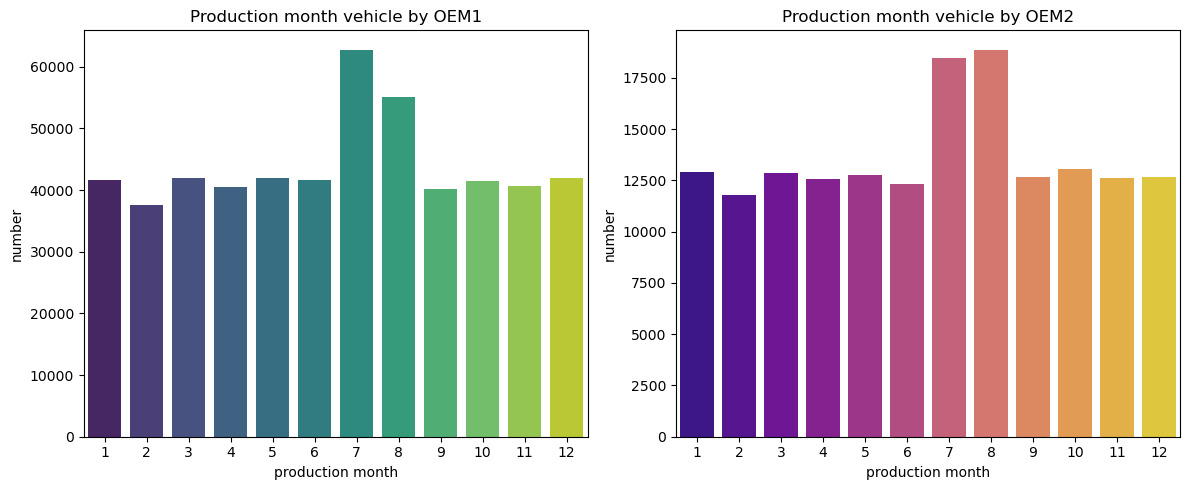

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# bar plot for production month of vehicles with parts from company 217 assembled by OEM1
sns.barplot(x=anzahl_monat1.index, y=anzahl_monat1.values, ax=axes[0], palette='viridis')
axes[0].set_title('Production month vehicle by OEM1')
axes[0].set_xlabel('production month')
axes[0].set_ylabel('number')

# bar plot for production month of vehicles with parts from company 217 assembled by OEM2
sns.barplot(x=anzahl_monat2.index, y=anzahl_monat2.values, ax=axes[1], palette='plasma')
axes[1].set_title('Production month vehicle by OEM2')
axes[1].set_xlabel('production month')
axes[1].set_ylabel('number')

# display diagrams
plt.tight_layout()
plt.show()

In [105]:
OEM1['Year_Fahrzeug']=pd.to_datetime(OEM1['Produktionsdatum_Fahrzeug']).dt.year
OEM2['Year_Fahrzeug']=pd.to_datetime(OEM2['Produktionsdatum_Fahrzeug']).dt.year

In [106]:
anzahl_year1=OEM1['Year_Fahrzeug'].value_counts()
anzahl_year2=OEM2['Year_Fahrzeug'].value_counts()

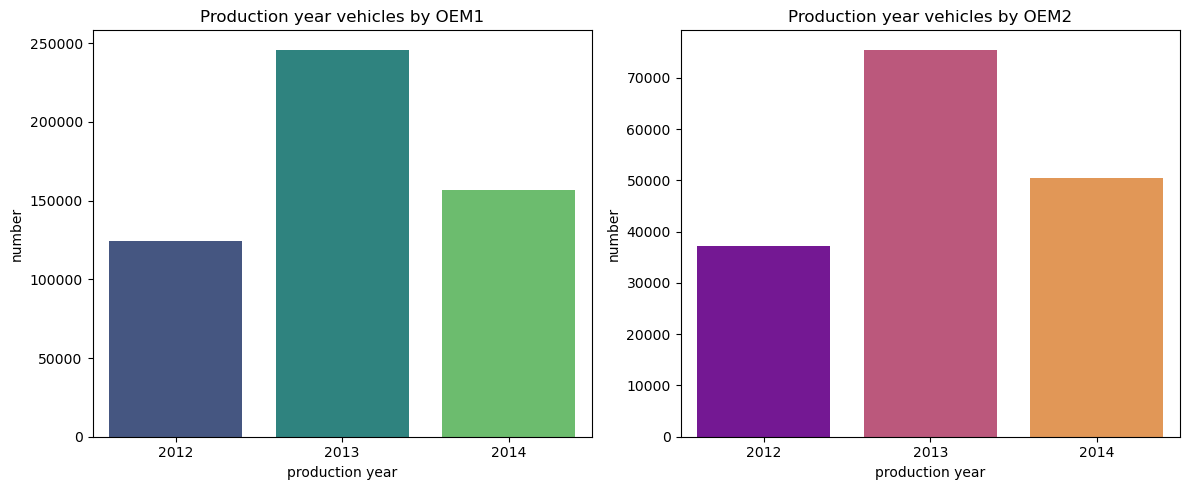

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# bar plot for production year of vehicles with parts from company 217 assembled by OEM1
sns.barplot(x=anzahl_year1.index, y=anzahl_year1.values, ax=axes[0], palette='viridis')
axes[0].set_title('Production year vehicles by OEM1')
axes[0].set_xlabel('production year')
axes[0].set_ylabel('number')

# # bar plot for production year of vehicles with parts from company 217 assembled by OEM2
anzahl_year2_filtered = anzahl_year2[~anzahl_year2.index.isin([2015, 2016])]
sns.barplot(x=anzahl_year2_filtered.index, y=anzahl_year2_filtered.values, ax=axes[1], palette='plasma')
axes[1].set_title('Production year vehicles by OEM2')
axes[1].set_xlabel('production year')
axes[1].set_ylabel('number')

# display diagram
plt.tight_layout()
plt.show()

In [108]:
year2012_Typ=OEM1[OEM1['Year_Fahrzeug'] == 2012]['Type_Fahrzeug'].value_counts()
year2013_Typ=OEM1[OEM1['Year_Fahrzeug'] == 2013]['Type_Fahrzeug'].value_counts()
year2014_Typ=OEM1[OEM1['Year_Fahrzeug'] == 2014]['Type_Fahrzeug'].value_counts()
OEM1_year_typ=pd.DataFrame( {
    'Jahr': [2012, 2013, 2014],
    'number type 11': [98868, 195339, 123677],
    'number type 12': [25801, 50609, 33019]
})

In [109]:
year2012_Typ=OEM2[OEM2['Year_Fahrzeug'] == 2012]['Type_Fahrzeug'].value_counts()
year2013_Typ=OEM2[OEM2['Year_Fahrzeug'] == 2013]['Type_Fahrzeug'].value_counts()
year2014_Typ=OEM2[OEM2['Year_Fahrzeug'] == 2014]['Type_Fahrzeug'].value_counts()
OEM2_year_typ=pd.DataFrame( {
    'Jahr': [2012, 2013, 2014],
    'number type 21': [23330, 47847, 32088],
    'number type 22': [13909, 27642, 18441]
})

In the graphs below, the production year and type of vehicle are displayed in one visual to identify relations between these two factors for informing production companies OEM1 and OEM2. OEM1 produces higher amounts of vehicles of type 11 than type 12. The ratio of type 11 and type 12 vehicles are consistent over the years with the highest total amount in year 2013, as found before. Car manufacturer OEM2 produces more faulty cars of type 21 than of type 22 with a varying ratio over the years. In year 2012 the difference in vehicle types with rust spots is smaller than that in years 2013 and 2014. The biggest difference can be found in production year 2013 where close to 30000 cars with rust of type 22 and close to 50000 cars of type 21 with the same issue are produced. 

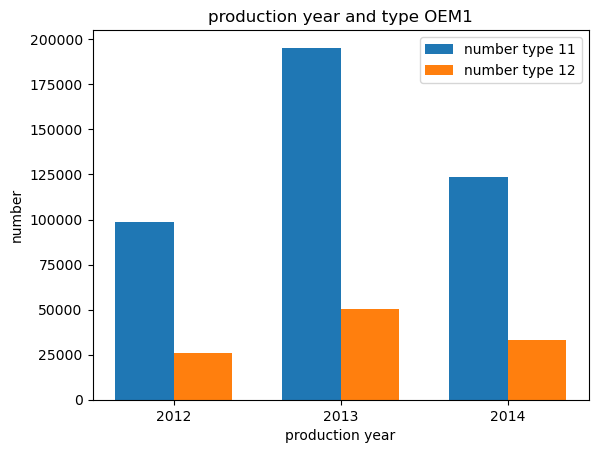

In [111]:
x = np.arange(len(OEM1_year_typ['Jahr']))  # position of x-values
width = 0.35  # width of the bars
fig, ax = plt.subplots()
# bars for vehicle type 11
bars1 = ax.bar(x - width/2, OEM1_year_typ['number type 11'], width, label='number type 11')
# bars for vehicle type 12
bars2 = ax.bar(x + width/2, OEM1_year_typ['number type 12'], width, label='number type 12')
# axis and label
ax.set_xlabel('production year')
ax.set_ylabel('number')
ax.set_title('production year and type OEM1')
ax.set_xticks(x)
ax.set_xticklabels(OEM1_year_typ['Jahr'])
ax.legend()
plt.show()

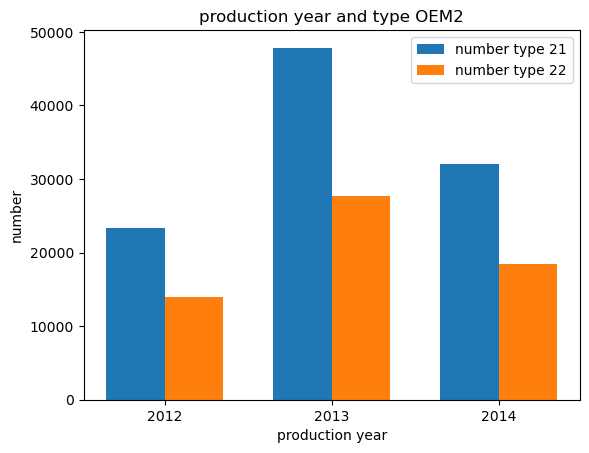

In [112]:
x = np.arange(len(OEM2_year_typ['Jahr']))  # position of x-values
width = 0.35  # width of the bars
fig, ax = plt.subplots()
# bars for vehicle type 21
bars1 = ax.bar(x - width/2, OEM2_year_typ['number type 21'], width, label='number type 21')
# bars for vehicle type 22
bars2 = ax.bar(x + width/2, OEM2_year_typ['number type 22'], width, label='number type 22')
# axis and labels
ax.set_xlabel('production year')
ax.set_ylabel('number')
ax.set_title('production year and type OEM2')
ax.set_xticks(x)
ax.set_xticklabels(OEM2_year_typ['Jahr'])
ax.legend()
plt.show()

It can be concluded that the vehicle types 11 and 21 of the car manufacturers OEM1 and OEM2 are more critical when it comes to rust prone parts installed in the cars. This finding is consistent throughout the years. The peak months of car production where rust prone parts are inserted are July and August in both car manufacturing companies OEM1 and OEM2. One potential reason being that workers are on vacation and more errors in supervision and management of quality control are occurring during this time of year. 

## Production plant location <a name="Location"></a>

For identification of the locations where the rust prone parts are installed in vehicles, the pie charts below show the percentage of faulty cars produced in the different production plant locations of car manufacturers OEM1 and OEM2, respectively. It can be found that car manufacturer OEM1 produces 47.7% of faulty cars in the production plant located in Nuernberg and the remaining 52.3% in their plant in Bonn. The company OEM2 mainly produces the cars with premature rust spot parts in their production plant in Goettingen (70.7%) and the remaining 29.3% in Regensburg. Knowing the critical production plan locations, the car manufacturers can install new personnel for quality control in these specific plants to prevent the implementation of rust prone parts in the future.

In [116]:
anzahl_Ort1=OEM1['ORT_Fahrzeug'].value_counts()
anzahl_Ort2=OEM2['ORT_Fahrzeug'].value_counts()
print(anzahl_Ort2.head())

ORT_Fahrzeug
GOETTINGEN    115532
REGENSBURG     47988
Name: count, dtype: int64


In [117]:
# Which vehicle types  that are affected by premature rust spots of comapny 217 are produced in which plants?
anzahl_Nuernberg = OEM1[OEM1['ORT_Fahrzeug'] == 'NUERNBERG']['Type_Fahrzeug'].value_counts()
anzahl_Bonn = OEM1[OEM1['ORT_Fahrzeug'] == 'BONN']['Type_Fahrzeug'].value_counts()
anzahl_Goettingen = OEM2[OEM2['ORT_Fahrzeug'] == 'GOETTINGEN']['Type_Fahrzeug'].value_counts()
anzahl_Regensburg = OEM2[OEM2['ORT_Fahrzeug'] == 'REGENSBURG']['Type_Fahrzeug'].value_counts()
print(anzahl_Nuernberg.head(),anzahl_Bonn.head(),anzahl_Goettingen,anzahl_Regensburg)

Type_Fahrzeug
11    251744
Name: count, dtype: int64 Type_Fahrzeug
11    166140
12    109429
Name: count, dtype: int64 Type_Fahrzeug
21    103432
22     12100
Name: count, dtype: int64 Type_Fahrzeug
22    47988
Name: count, dtype: int64


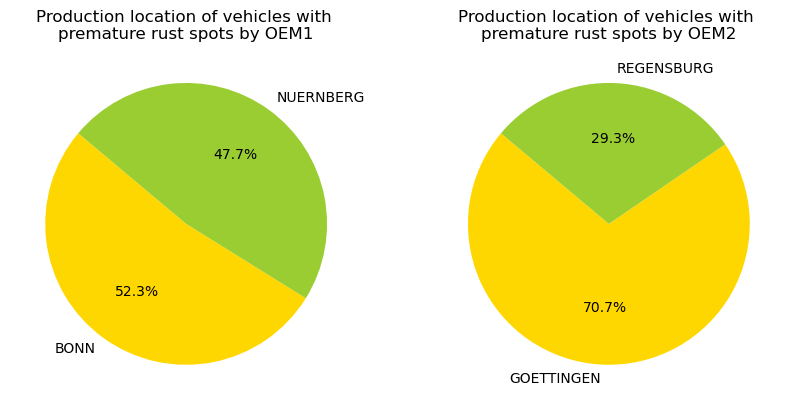

In [118]:
# plot 2 diagrams beside each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
colors1 = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# diagram for car manufacturer OEM1
ax1.pie(anzahl_Ort1.values, labels=anzahl_Ort1.index, colors=colors1, autopct='%1.1f%%', startangle=140)
ax1.set_title('Production location of vehicles with \npremature rust spots by OEM1')

# diagram for car manufacturer OEM2
ax2.pie(anzahl_Ort2.values, labels=anzahl_Ort2.index, colors=colors1, autopct='%1.1f%%', startangle=140)
ax2.set_title('Production location of vehicles with \npremature rust spots by OEM2')

# display diagrams
plt.show()

In [119]:
# data frame with absolute figures from pie diagram for OEM1 and OEM2
OEM1_Ort_typ=pd.DataFrame( {
    'Ort': anzahl_Ort1.index,
    'number type 11': [166140,251744],
    'number type 12': [109429,0]
})
OEM2_Ort_typ=pd.DataFrame( {
    'Ort': anzahl_Ort2.index,
    'number type 21': [103432,0],
    'number type 22': [12100,47988]
})

#print(OEM1_Ort_typ,OEM2_Ort_typ)

As can be seen in the graph below, the production plant in Nuernberg only produces cars of type 11, whereas in Bonn, both vehicle types of car manufacturer OEM1 are produced. This means that the personnel in Bonn is responsible for faulty installed parts in the vehicle type 12 and Nuernberg personnel produces the higher amount of faulty cars of type 11. In Regensburg, most of faulty cars of type 22 are produced. Goettingen’s personnel is responsible for not recognizing the rusty parts in cars of type 21. Here, a small amount of faulty cars of type 22 are produced. 

Using this information, car manufacturers OEM1 and OEM2 can install better quality control targeted at specific vehicle types for their different production plants. 

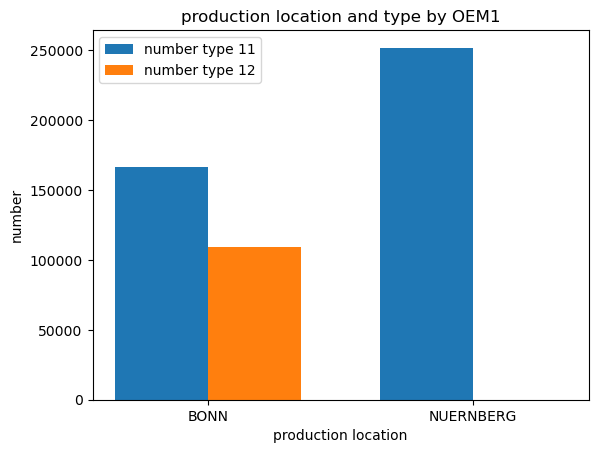

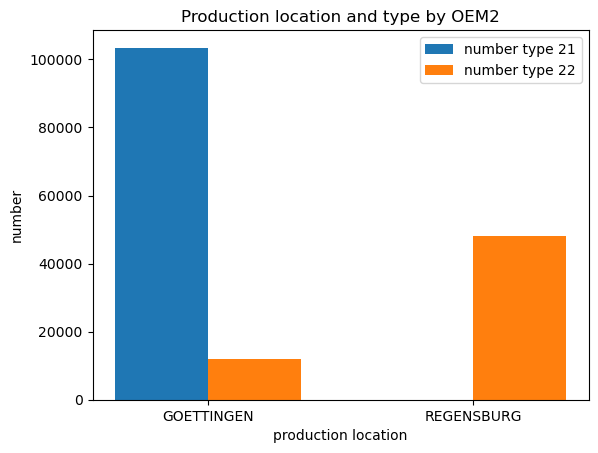

In [121]:
# OEM 1 plant and type of vehicle affected by premature rust spots
x = np.arange(len(OEM1_Ort_typ['Ort']))  # position of x values
width = 0.35  # width of a bar
fig, ax = plt.subplots()
# vehicle type 11
bars1 = ax.bar(x - width/2, OEM1_Ort_typ['number type 11'], width, label='number type 11')
# vehicle type 12
bars2 = ax.bar(x + width/2, OEM1_Ort_typ['number type 12'], width, label='number type 12')
# axis and labels
ax.set_xlabel('production location')
ax.set_ylabel('number')
ax.set_title('production location and type by OEM1')
ax.set_xticks(x)
ax.set_xticklabels(OEM1_Ort_typ['Ort'])
ax.legend()

# OEM 2 plant and type of vehicle affected by premature rust spots
x2 = np.arange(len(OEM2_Ort_typ['Ort']))  # position of x values
width = 0.35  # width of the bars
fig, ax = plt.subplots()
# bars for vehicle type 21
bars1 = ax.bar(x2 - width/2, OEM2_Ort_typ['number type 21'], width, label='number type 21')
# bars for vehicle type 22
bars2 = ax.bar(x2 + width/2, OEM2_Ort_typ['number type 22'], width, label='number type 22')
# axis and labels
ax.set_xlabel('production location')
ax.set_ylabel('number')
ax.set_title('Production location and type by OEM2')
ax.set_xticks(x2)
ax.set_xticklabels(OEM2_Ort_typ['Ort'])
ax.legend()
plt.show()

## Customer car registration location <a name="Customer"></a>

The customers that possess vehicles with rust issue are identified via identification number of their vehicles. Customers of the car manufacturer OEM1 mainly register their cars in Koeln, Dortmund and Dresden with the highest number of faulty cars registered in Koeln. These three registration locations are the top ones for car registrations of customers that bought their vehicle from the car manufacturer OEM2. 

In [124]:
anzahl_Zulassung_Ort1 = df_gesamt[df_gesamt['Herstellernummer_Fahrzeug'] == 1]['Gemeinden'].value_counts()
anzahl_Zulassung_Ort2 = df_gesamt[df_gesamt['Herstellernummer_Fahrzeug'] == 2]['Gemeinden'].value_counts()
#print(anzahl_Zulassung_Ort1.head(),anzahl_Zulassung_Ort2.head())

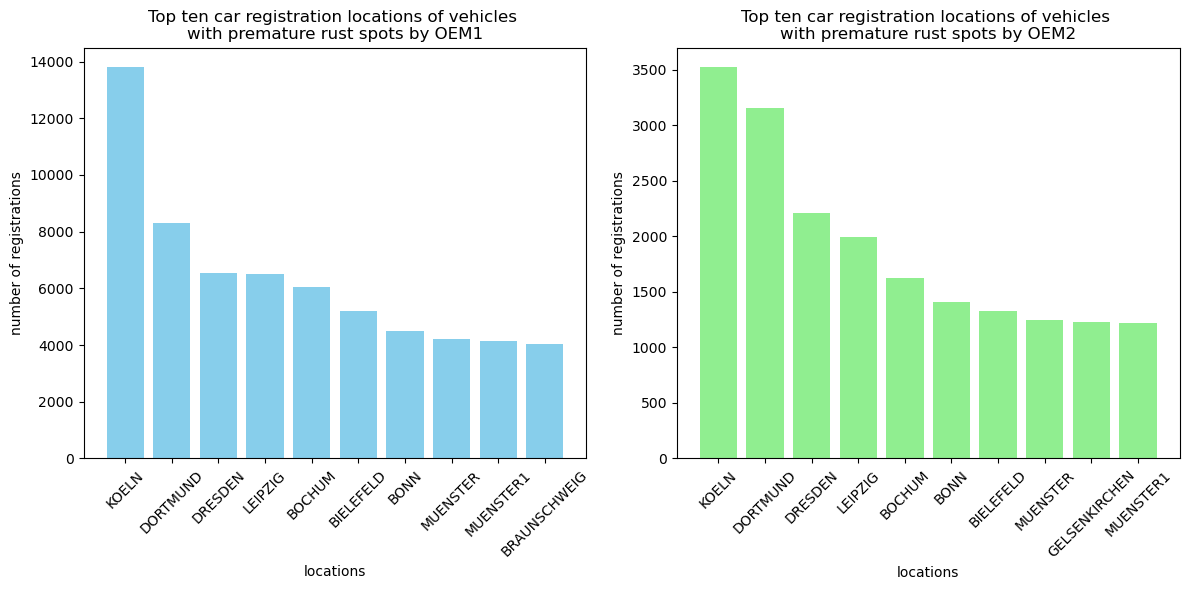

In [125]:
# Top-N parameters
N = 10

# only extracting top 10 values for OEM1
top_N_OEM1 = anzahl_Zulassung_Ort1.nlargest(N)

# only extracting top 10 values for OEM2
top_N_OEM2 = anzahl_Zulassung_Ort2.nlargest(N)

# figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# bar diagram for OEM1
ax1.bar(top_N_OEM1.index, top_N_OEM1.values, color='skyblue')
ax1.set_title('Top ten car registration locations of vehicles \nwith premature rust spots by OEM1')
ax1.set_xlabel('locations')
ax1.set_ylabel('number of registrations')
ax1.tick_params(axis='x', rotation=45)  # Drehe die x-Achsen-Beschriftungen für bessere Lesbarkeit

# bar diagram for OEM2
ax2.bar(top_N_OEM2.index, top_N_OEM2.values, color='lightgreen')
ax2.set_title('Top ten car registration locations of vehicles \nwith premature rust spots by OEM2')
ax2.set_xlabel('locations')
ax2.set_ylabel('number of registrations')
ax2.tick_params(axis='x', rotation=45)  # Drehe die x-Achsen-Beschriftungen für bessere Lesbarkeit

# display diagram
plt.tight_layout()
plt.show()